# Embedding and quantities of Sedimentary Facies Knowledge Graph based on Deepwalk and Word2Vec Models

## Code Reference

https://www.analyticsvidhya.com/blog/2019/11/graph-feature-extraction-deepwalk/

https://github.com/prateekjoshi565/DeepWalk

Package installing and visualization came from Bilibili@同济子豪兄

Cells of NLP and distance quanity comes from Author:
Keran Li, Mastery student from State Key Labratory of Oil & Gas Reservoir Geology, Chengdu University of Technology 

This tutorial is the appendix of the paper：A knowledge graph for standard carbonate microfacies and its application on the automatically reconstruction of the relative sea-level curve

## Package Installing

In [1]:
!pip install networkx gensim pandas numpy tqdm scikit-learn matplotlib re

## Packages Import

In [2]:
import networkx as nx # Graph Data Mining

# Packages for Data Analysis
import pandas as pd
import numpy as np

import random # Generating Random Number
from tqdm import tqdm # Progress Bar

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False  # To Show minus sign

import re

## Directed Graph Generating via Neo4j


1.Open Neo4j with the knowlege graph (previous part displayed detals), into the button "Table" and select "Export"

2.Generate the ".csv" files with the form of "Source (1st collumn), Target (2nd collumn), Distance (3rd collumn)", the "Distance" is the 
attributes between nodes

3.Check the integrity

In [3]:
df = pd.read_csv("E:\\文章\\知识图谱\\sedimentology_new.csv")

In [4]:
df.head()

,source,target,Unnamed: 2
0,Rimmed_carbonate_platform,RCP,NaN
1,Deep_water_basin,FZ1,NaN
2,Deep_shelf,FZ2,NaN
3,Toe_of_slope,FZ3,NaN
4,Slope,FZ4,NaN


In [5]:
df.shape

(620, 3)

## Graph Generating

In [6]:
G = nx.from_pandas_edgelist(df, "source", "target", create_using=nx.Graph())

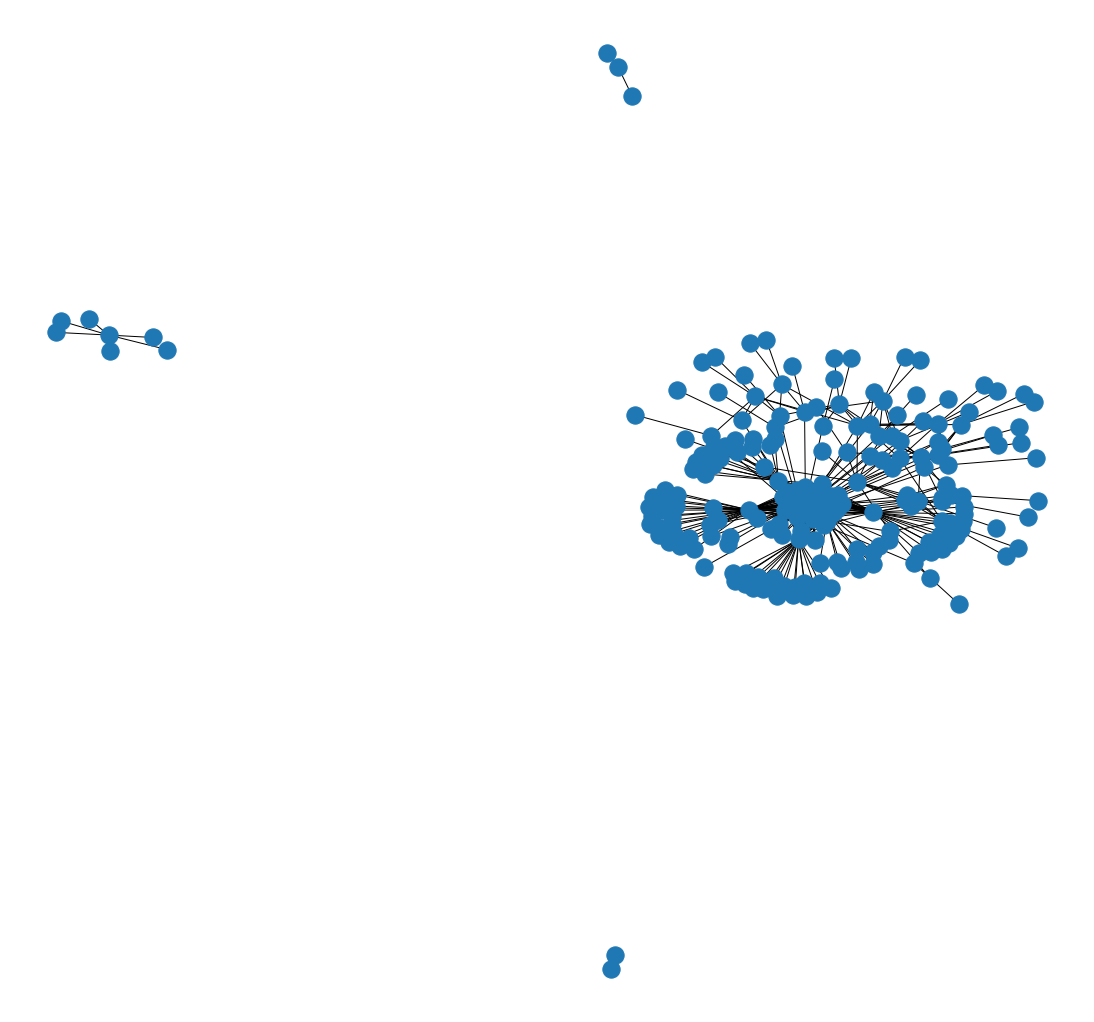

In [7]:
# Visualization
plt.figure(figsize=(15,14))
nx.draw(G)
plt.show()

## Generating the walk sequence

In [8]:
def get_randomwalk(node, path_length):
    '''
    Input the initial node and the lenth of sequence
    '''
    
    random_walk = [node]
    
    for i in range(path_length-1):
        # Adjacent nodes
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        # Select the next node from the sequence
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [9]:
all_nodes = list(G.nodes())

In [10]:
all_nodes

['Rimmed_carbonate_platform',
 'RCP',
 'Deep_water_basin',
 'FZ1',
 'Deep_shelf',
 'FZ2',
 'Toe_of_slope',
 'FZ3',
 'Slope',
 'FZ4',
 'Platform_margin_reefs',
 'FZ5',
 'Platform_margin_shoals',
 'FZ6',
 'Open_platform',
 'FZ7',
 'Restricted_platform',
 'FZ8',
 'Evaporites_platform',
 'FZ9',
 'Meteoric_freshwater_zone',
 'FZ10',
 'Spiculite_wackestone_packstone',
 'SMF1',
 'Microbioclastic_peloidal_calcisiltite',
 'SMF2',
 'Pelagic_mudstone_wackestone',
 'SMF3',
 'Microbreccia_biolithoclastic_packstone',
 'SMF4',
 'Allochthonous_bioclastic_grainstone_rudstone_packstone_floatstone_breccia',
 'SMF5',
 'Densely_packed_reef_rudstone',
 'SMF6',
 'Organic_boundstone_platform_margin_reef',
 'SMF7',
 'Whole_fossil_wackestone_floatstone',
 'SMF8',
 'Burrowed_bioclastic_wackestone',
 'SMF9',
 'Bioclastic_packstone_wackestone_with_worn_skeletal_grains',
 'SMF10',
 'Coated_bioclastic_grainstone',
 'SMF11',
 'Limestone_with_shell_concentrations',
 'SMF12S',
 'SMF12C',
 'Oncoid_rudstone_grainstone',


In [11]:
get_randomwalk('SMF7', 5)

['SMF7', 'MSD20']

## Sequence via deep-walk

In [12]:
gamma = 10 # the number of sequence
walk_length = 5 # Max lenth of the sequence

In [13]:
random_walks = []

for n in tqdm(all_nodes): # Traverse each node
    for i in range(gamma): # Generating gamma-number sequence from nodes
        random_walks.append(get_randomwalk(n, walk_length))

100%|█████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 10647.98it/s]


In [14]:
random_walks[1]

['Rimmed_carbonate_platform', 'RCP']

## Train the model of Word2Vec

In [15]:
from gensim.models import Word2Vec # NLP

In [16]:
model = Word2Vec(vector_size=256, # The dimension of Embedding
                 window=4, # The lenth of window
                 sg=1, # Skip-Gram
                 hs=0, # Softmax unlayered
                 negative=10, # Negative sampling
                 alpha=0.03,  # Initial learning rate 
                 min_alpha=0.0007, # Min learning rate
                 seed=14 # Random Seeds
                )

In [17]:
# Constructing vocabulary with random walk sequence
model.build_vocab(random_walks, progress_per=2)

In [18]:
# Training
model.train(random_walks, total_examples=model.corpus_count, epochs=50, report_delay=1)

(260444, 457200)

## Analysis of the result from Word2Vec

In [19]:
# Check the Embedding result from one node
model.wv.get_vector('SMF7').shape

(256,)

In [20]:
model.wv.get_vector('SMF7')

array([-2.21482277e-01,  9.59738158e-03, -2.13900059e-01, -9.37474445e-02,
        1.15150832e-01,  2.29456858e-03,  3.27880889e-01,  5.03551841e-01,
        3.64944749e-02, -4.10242260e-01,  1.46544367e-01, -2.42383599e-01,
       -2.38377586e-01,  2.72145927e-01,  3.31569701e-01, -2.57343315e-02,
        7.02377483e-02,  2.49372676e-01, -9.51780528e-02, -3.55245650e-01,
        3.13618183e-01,  1.34087354e-01,  6.99934065e-02, -2.93920059e-02,
       -1.44795433e-01, -2.92245716e-01, -1.06597401e-01,  7.40589015e-03,
        6.95619956e-02,  4.69245136e-01,  3.31712306e-01, -1.63816229e-01,
        1.62556246e-01, -2.11638242e-01,  5.02444953e-02,  4.63845991e-02,
        2.01413408e-02, -4.68373708e-02,  1.39240637e-01,  5.33372611e-02,
       -3.66539538e-01, -1.41271666e-01,  1.50963411e-01, -5.29418364e-02,
       -2.07286514e-02, -1.73279375e-01, -5.28632179e-02,  2.63909977e-02,
        5.97530864e-02, -1.60798088e-01, -2.36014396e-01, -4.06719774e-01,
       -2.72802562e-01, -

In [21]:
# Test of searching similar words
model.wv.similar_by_word('SMF7')

[('Platform_margin_reefs', 0.769740104675293),
 ('MSD20', 0.7509692907333374),
 ('FZD6', 0.7162463068962097),
 ('MSD16', 0.6830814480781555),
 ('FZ5', 0.647959291934967),
 ('SMF11', 0.6413838863372803),
 ('Organic_boundstone_platform_margin_reef', 0.6209610104560852),
 ('bioclastic', 0.5762928128242493),
 ('cross beddeding', 0.5353313684463501),
 ('packstones and bindstones', 0.5349199771881104)]

## Dimension reduction visualization via PCA

### Two-dimentional embedding and visualization  of all words

In [22]:
X = model.wv.vectors

In [23]:
# From 256 dimensions to 2 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

In [24]:
embed_2d.shape

(213, 2)

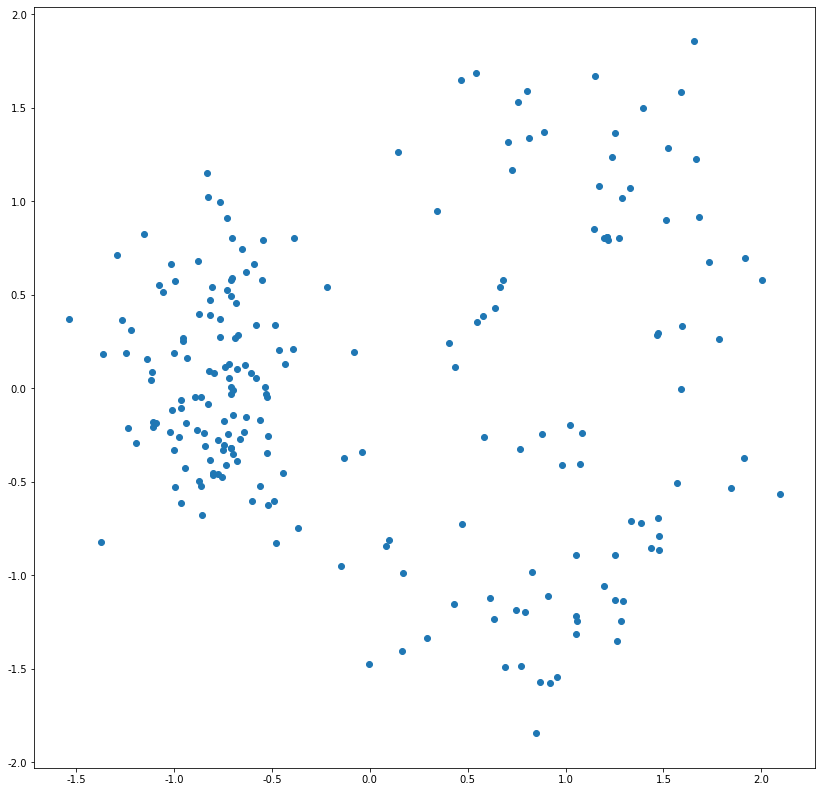

In [25]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()


### Two dimensional visualization and embedding of one node

In [26]:
term = 'SMF7'

In [27]:
term_256d = model.wv[term].reshape(1,-1)

In [28]:
term_256d.shape

(1, 256)

In [29]:
term_2d = pca.transform(term_256d)

In [30]:
term_2d

array([[0.40310687, 0.24157952]], dtype=float32)

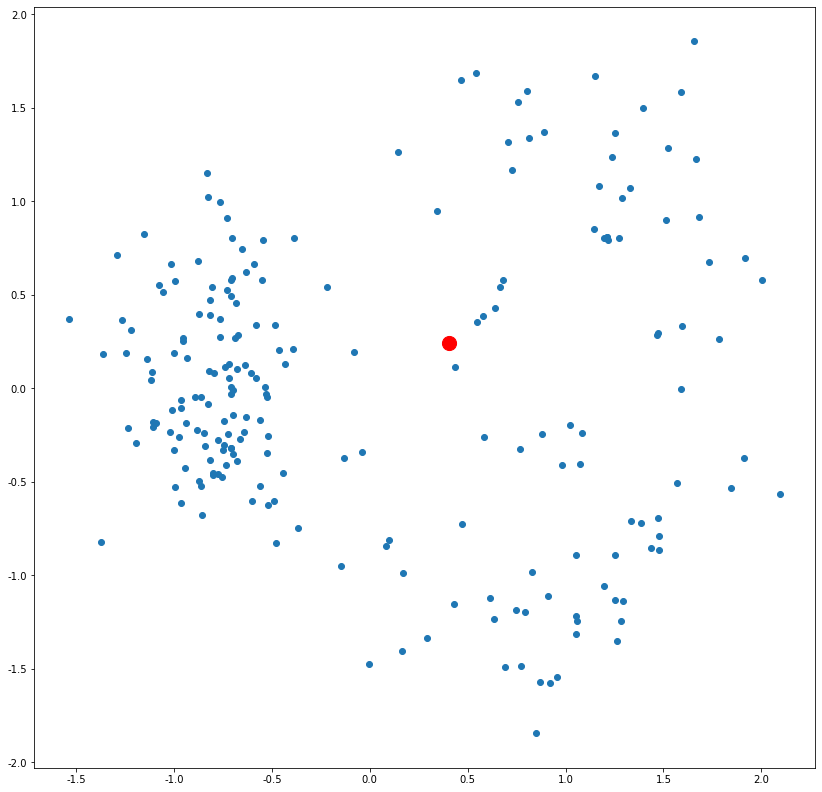

In [31]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])
plt.scatter(term_2d[:,0],term_2d[:,1],c='r',s=200)
plt.show()

### Two dimensional visualization and embedding of some nodes

In [32]:
# Calculate PageRank
pagerank = nx.pagerank(G)
# Rank
node_importance = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

In [33]:
# Select the n highest nodes
n = 30
terms_chosen = []
for each in node_importance[:n]:
    terms_chosen.append(each[0])

In [34]:
# Add nodes
terms_chosen.extend(['Grain_Tyes','Grain_content','Matrix_Tyes','Matrix_content','Depositional_fabrics','Fossils_Tyes','Fossils_content',
                     'Texture_types','Grain_content','Grain_sorting','Grain_rounding','FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9',
                     'FZ10','SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C',
                     'SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23','SMF24','SMF25','SMF26',
                    'FZD10','FZD9','FZD8','FZD7','FZD6','FZD5','FZD4','FZD3','FZD2','FZD1','MSD26','MSD25','MSD24','MSD23','MSD22','MSD21',
                     'MSD20','MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11','MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4',
                     'MSD3','MSD2','MSD1'])

In [35]:
# Add nodes
terms_chosen = []
terms_chosen.extend(['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10',
                     'SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9',
                     'SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C', 'SMF15R',
                     'SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20',
                     'SMF21','SMF22','SMF23','SMF24','SMF25','SMF26', 
                     'FZD10','FZD9','FZD8','FZD7','FZD6','FZD5','FZD4','FZD3','FZD2',
                     'FZD1','MSD26','MSD25','MSD24','MSD23','MSD22','MSD21', 'MSD20',
                     'MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11',
                     'MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4','MSD3','MSD2','MSD1'])


In [36]:
# Add nodes
terms_chosen_FZ = []
terms_chosen_FZ.extend(['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10'])

In [37]:
terms_chosen_FZ

['FZ1', 'FZ2', 'FZ3', 'FZ4', 'FZ5', 'FZ6', 'FZ7', 'FZ8', 'FZ9', 'FZ10']

In [38]:
# Add nodes
terms_chosen_SMF = []
terms_chosen_SMF.extend(['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9',
                     'SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C', 'SMF15R',
                     'SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20',
                     'SMF21','SMF22','SMF23','SMF24','SMF25','SMF26'])

In [39]:
terms_chosen_SMF

['SMF1',
 'SMF2',
 'SMF3',
 'SMF4',
 'SMF5',
 'SMF6',
 'SMF7',
 'SMF8',
 'SMF9',
 'SMF10',
 'SMF11',
 'SMF12S',
 'SMF12C',
 'SMF13',
 'SMF15C',
 'SMF15R',
 'SMF15M',
 'SMF16L',
 'SMF16NL',
 'SMF17',
 'SMF18',
 'SMF19',
 'SMF20',
 'SMF21',
 'SMF22',
 'SMF23',
 'SMF24',
 'SMF25',
 'SMF26']

In [40]:
# Add nodes
terms_chosen_FZD = []
terms_chosen_FZD.extend(['FZD10','FZD9','FZD8','FZD7','FZD6','FZD5','FZD4','FZD3','FZD2',
                     'FZD1'])

In [41]:
terms_chosen_FZD

['FZD10',
 'FZD9',
 'FZD8',
 'FZD7',
 'FZD6',
 'FZD5',
 'FZD4',
 'FZD3',
 'FZD2',
 'FZD1']

In [42]:
# Add nodes
terms_chosen_MSD = []
terms_chosen_MSD.extend(['MSD26','MSD25','MSD24','MSD23','MSD22','MSD21', 'MSD20',
                     'MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11',
                     'MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4','MSD3','MSD2','MSD1'])


In [43]:
terms_chosen_MSD

['MSD26',
 'MSD25',
 'MSD24',
 'MSD23',
 'MSD22',
 'MSD21',
 'MSD20',
 'MSD19',
 'MSD18',
 'MSD17',
 'MSD16',
 'MSD15',
 'MSD14',
 'MSD12',
 'MSD11',
 'MSD10',
 'MSD9',
 'MSD8',
 'MSD7',
 'MSD6',
 'MSD5',
 'MSD4',
 'MSD3',
 'MSD2',
 'MSD1']

In [44]:
# Input word, output indes
term2index = model.wv.key_to_index

In [45]:
index2term = model.wv.index_to_key
term_index = np.array(term2index.values())

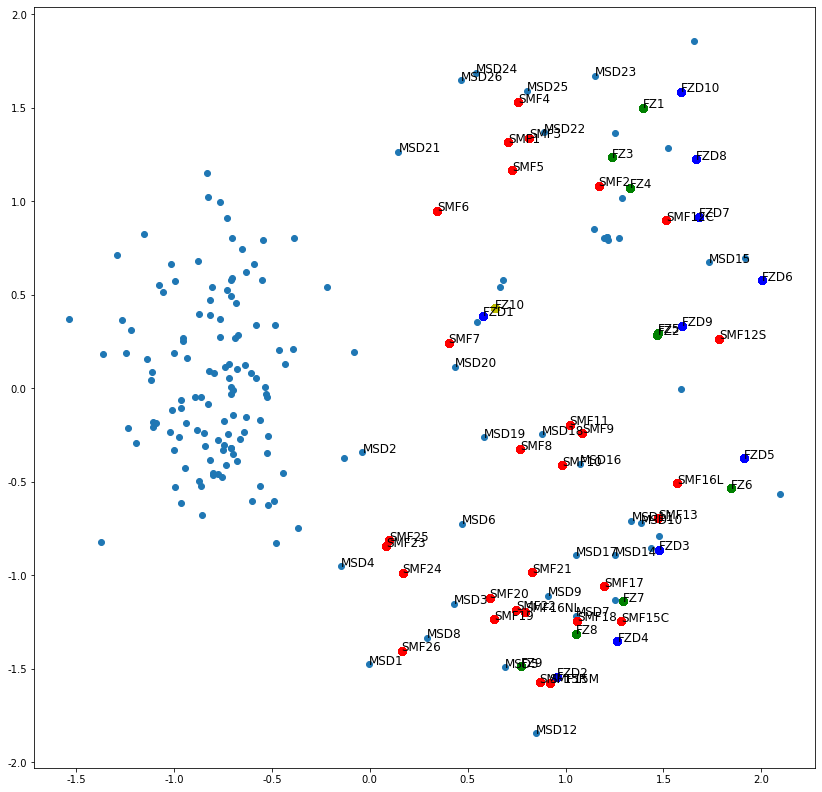

In [46]:
# Visualization
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    for i in terms_chosen_SMF:
        idx_SMF = term2index[i]
        plt.scatter(embed_2d[idx_SMF,0], embed_2d[idx_SMF,1],c='r',s=50)
    for j in terms_chosen_FZ:
        idx_FZ = term2index[j]
        plt.scatter(embed_2d[idx_FZ,0], embed_2d[idx_FZ,1],c='g',s=50)
    for k in terms_chosen_FZD:
        idx_FZD = term2index[k]
        plt.scatter(embed_2d[idx_FZD,0], embed_2d[idx_FZD,1],c='b',s=50)
    for l in terms_chosen_MSD:
        idx_MSD = term2index[j]
        plt.scatter(embed_2d[idx_MSD,0], embed_2d[idx_MSD,1],c='y',s=50)
    plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
    plt.savefig("vis_1.svg")
plt.show()

## Two dimensional visualization and embedding of some nodes via TSNE

### Two dimensional visualization and embedding of some nodes

In [47]:
# From 256 dimensions to 2 dimensions
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
embed_2d = tsne.fit_transform(X)

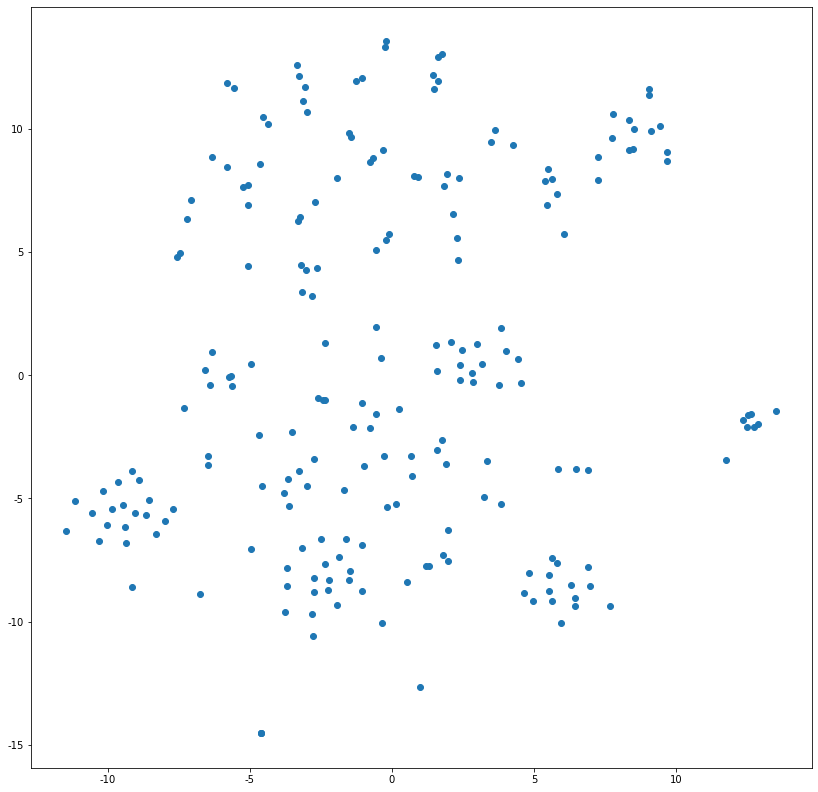

In [48]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:, 0], embed_2d[:, 1])
plt.show()

### Two dimensional visualization and embedding of some nodes

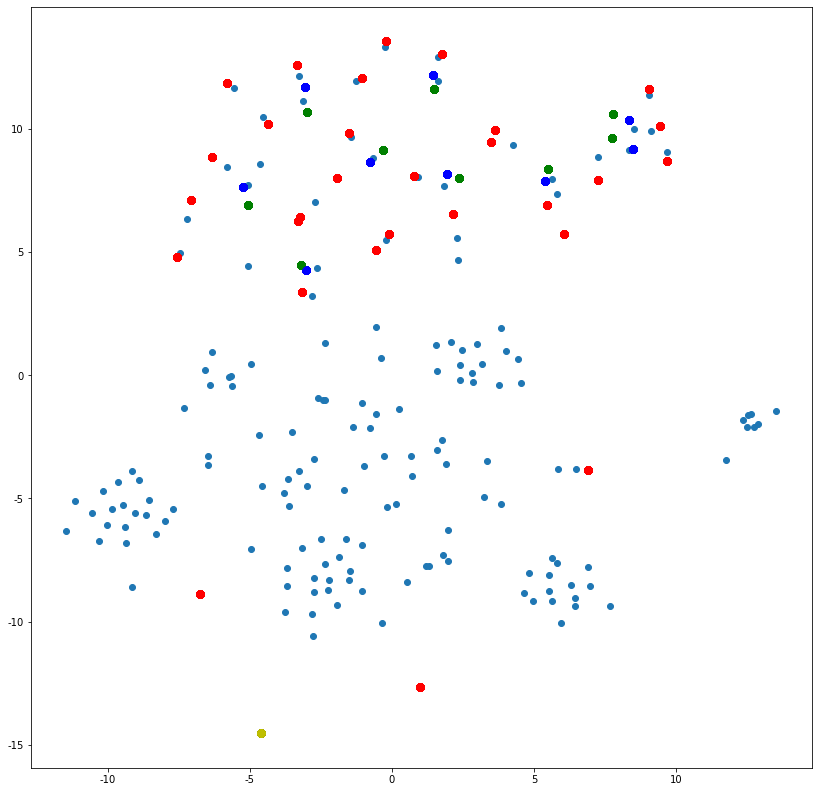

In [65]:
plt.figure(figsize=(14,14))
plt.scatter(embed_2d[:,0], embed_2d[:,1])

for item in terms_chosen:
    idx = term2index[item]
    for i in terms_chosen_SMF:
        idx_SMF = term2index[i]
        plt.scatter(embed_2d[idx_SMF,0], embed_2d[idx_SMF,1],c='r',s=50)
    for j in terms_chosen_FZ:
        idx_FZ = term2index[j]
        plt.scatter(embed_2d[idx_FZ,0], embed_2d[idx_FZ,1],c='g',s=50)
    for k in terms_chosen_FZD:
        idx_FZD = term2index[k]
        plt.scatter(embed_2d[idx_FZD,0], embed_2d[idx_FZD,1],c='b',s=50)
    for l in terms_chosen_MSD:
        idx_MSD = term2index[j]
        plt.scatter(embed_2d[idx_MSD,0], embed_2d[idx_MSD,1],c='y',s=50)
#     plt.annotate(item, xy=(embed_2d[idx,0], embed_2d[idx,1]),c='k',fontsize=12)
    plt.savefig("vis.png")
plt.show()

In [50]:
embed_2d.shape

(213, 2)

### Export two-dimensional embedding via TSNE

In [51]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [52]:
df = pd.DataFrame()
df['X'] = embed_2d[:,0]
df['Y'] = embed_2d[:,1]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [53]:
df

,X,Y,item,pagerank,chosen
0,-2.767000,-10.597633,Grain_Tyes,0.004695,0.0
1,-11.463583,-6.331543,Texture_types,0.004695,0.0
2,3.858420,1.929929,Depositional_fabrics,0.001790,0.0
3,7.686471,-9.348972,Fossils_Tyes,0.008939,0.0
4,-6.332894,0.928544,Grain_sorting,0.001718,0.0
...,...,...,...,...,...
208,-9.037527,-5.587147,trapped and bound together by non-skeletal mic...,0.001787,0.0
209,-2.741071,-8.797654,ooid,0.001791,0.0
210,-2.222160,-8.323034,peloids,0.001787,0.0
211,-7.685882,-5.431829,grainstone,0.001791,0.0


In [54]:
df.to_csv('tsne_vis_2d.csv',index=False)

### Three dimensional visualization and embedding of all nodes

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=1000)
embed_3d = tsne.fit_transform(X)

### Export three dimensional embedding after TSNE reduce dimonsion

In [56]:
df = pd.DataFrame()
df['X'] = embed_3d[:,0]
df['Y'] = embed_3d[:,1]
df['Z'] = embed_3d[:,2]
df['item'] = model.wv.index_to_key
df['pagerank'] = pagerank.values()
df['chosen'] = terms_chosen_mask

In [57]:
df

,X,Y,Z,item,pagerank,chosen
0,48.552692,-97.460838,-53.268394,Grain_Tyes,0.004695,0.0
1,98.140419,-5.184582,-132.383133,Texture_types,0.004695,0.0
2,40.133251,171.328476,1.004631,Depositional_fabrics,0.001790,0.0
3,-39.438259,101.325760,-68.615913,Fossils_Tyes,0.008939,0.0
4,-93.616821,-31.613308,-128.320618,Grain_sorting,0.001718,0.0
...,...,...,...,...,...,...
208,71.356552,32.058529,-75.419807,trapped and bound together by non-skeletal mic...,0.001787,0.0
209,-114.953468,-22.312386,112.578102,ooid,0.001791,0.0
210,-3.922546,-103.111359,-89.200577,peloids,0.001787,0.0
211,91.643738,31.062744,-45.402088,grainstone,0.001791,0.0


In [58]:
df.to_csv('tsne_vis_3d.csv',index=False)

In [59]:
# Set item as index to future operation
df = df.set_index('item')

In [60]:
df

,X,Y,Z,pagerank,chosen
item,,,,,
Grain_Tyes,48.552692,-97.460838,-53.268394,0.004695,0.0
Texture_types,98.140419,-5.184582,-132.383133,0.004695,0.0
Depositional_fabrics,40.133251,171.328476,1.004631,0.001790,0.0
Fossils_Tyes,-39.438259,101.325760,-68.615913,0.008939,0.0
Grain_sorting,-93.616821,-31.613308,-128.320618,0.001718,0.0
...,...,...,...,...,...
trapped and bound together by non-skeletal microbes and algae,71.356552,32.058529,-75.419807,0.001787,0.0
ooid,-114.953468,-22.312386,112.578102,0.001791,0.0
peloids,-3.922546,-103.111359,-89.200577,0.001787,0.0


In [61]:
# DataFrame is used to preseve embedding results
# Use ".loc" method  to lacalize nodes and silces methods to search out XYZ
# ".loc" method returns series
df.loc['Grain_Tyes',['X','Y','Z']]['X']

48.55269241333008

In [62]:
# Search the vector of words
def w2v_search(word):
    
    v = df.loc[word, ['X','Y','Z']]
    
    return v

In [63]:
# Calculate the Euler distance of vectors
def distance_Euler(start, terminal):
    
    dis_x = (w2v_search(start)['X'] - w2v_search(terminal)['X'])**2
    dis_y = (w2v_search(start)['Y'] - w2v_search(terminal)['Y'])**2
    dis_z = (w2v_search(start)['Z'] - w2v_search(terminal)['Z'])**2
    distance = np.sqrt(dis_x + dis_y + dis_z)
    
    return distance

In [66]:
# Distance test
dis1 = distance_Euler('Non-laminated','SMF8')
dis2 = distance_Euler('SMF7','SMF8')
dis3 = distance_Euler('FZ4','SMF8')

In [72]:
dis1

217.9345254789654

In [73]:
dis2

186.25457887214245

In [74]:
dis3

174.01245252452424

### From the knowledge graph on Neo4j, SMF8 is directly connected with FZ4, and SMF7 is adjacant while disconnected with SMF8, but Non-laminated is disadjacant and undirectly connected with SMF8. Based on it the ideal distance should be like: distance (SMF8, FZ4) < distance (SMF7, SMF8) < distance (Non-laminated, SMF8). The calculated distance is like: dis3 (174.01) < dis2 (186.25) < dis1 (217.93). Calculated distance is same with ideal ones so that Euler distance is powerful to quantity the distance of knowledge graph.

In [75]:
# Define a DataFrame, which the sequential int numbers (0，1，2，3......n) are index and standard microfacies (SMF1,SMF2,SMF3,......SMFn) 
# are objects, for searching
smf = ['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13',
                   'SMF15C','SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23',
                   'SMF24','SMF25','SMF26']
smf = pd.DataFrame(smf)

In [76]:
smf

,0
0,SMF1
1,SMF2
2,SMF3
3,SMF4
4,SMF5
5,SMF6
6,SMF7
7,SMF8
8,SMF9
9,SMF10


In [77]:
# Create softmax function and modify distance to probability
def softmax_dis(dis):
    
    dis_max = np.max(dis)
    dis_min = np.min(dis)
    dis = dis/(dis_max - dis_min)
    dis = np.exp((1/dis).T)
    total = dis.sum(axis=0)
    result = pd.DataFrame(dis/total)
    
    return result.max()

In [78]:
# Calculate distance of multi input

# sentence contains a series features
# For example,after petrologic analysis, information got as: [Grain_Types:Bioclastic,
# Grain_content:Common, Matrix_Types:Micrite ,Matrix_content:Common,
# Fossils_Types:Crinoids, brachiopods, bryozoans, and scattered rugose corals,
# Fossils_content:Common,Depositional fabrics:Strongly burrowed ,Texture types:Wackestone]
# sentence is a list：['Bioclastic','Common','Micrite','Common',
# 'Crinoids, brachiopods, bryozoans, and scattered rugose corals','Common','Strongly burrowed','Wackestone' ]

def f2smf (sentence):
    
    classification = [0]*len(sentence)
    
    for i in range(len(sentence)):
        dis = [0]*28
        for j in range(28):
            dis[j] = int(distance_Euler(sentence[i],smf.iloc[j]))
            dis.append(dis[j])
            Dis = np.array(dis)
            classification[i] = softmax_dis(Dis)
            classification.append(classification[i])
    
    classification = np.array(classification)
    classification = classification.reshape(29,8)
    classification = np.dot(classification, np.ones(8).reshape(8,1))
    classification = pd.DataFrame(classification, index = smf)
            
    return classification.T

In [79]:
id_73 = f2smf(['Bioclastic','common','Micrite',
       'common','crinoids',
       'common',
       'Strongly burrowed',
       'wackestone'])

<ipython-input-77-ae8f73df0cbd>:7: RuntimeWarning: divide by zero encountered in true_divide
  dis = np.exp((1/dis).T)
<ipython-input-77-ae8f73df0cbd>:9: RuntimeWarning: invalid value encountered in true_divide
  result = pd.DataFrame(dis/total)


In [87]:
id_73.T

,SMF1,0
0,SMF2,0.00
1,SMF3,0.00
2,SMF4,0.00
3,SMF5,0.01
4,SMF6,0.02
5,SMF7,0.02
6,SMF8,0.02
7,SMF9,0.93
8,SMF10,0.00
9,SMF11,0.00


### These features are obtained from id_73 via thin section analysis, including: {Grain_type: Bioclastic}, {Grain_content: Common}, {Matrix_Types: Micrite}, {Matrix_content: Common}, {Fossils_Types: Crinoids, brachiopods, bryozoans, and scattered rugose coral}, {Fossils_content: Common}, {Depositional fabrics: Strongly burrowed} and {Texture types: Wackestone}. Theses features are evidences that the id_73 sample belongs to SMF9. The distance calculation also shows id_73 has the highest probability in SMF9. This case directly prove that the automatic standard micro-facies prediction is reliable. 

In [92]:
# Calculate distance of multi SMF and predict FZD

# sentence contains a series of SMF, i.e., the sentence icludes: [SMF15C, SMF13, SMF11, SMF12C, SMF11, SMF7, 
# SMF13, SMF12C, SMF12S, SMF6, SMF5, SMF13, SMF12C, SMF11, SMF7]

# The evolution of FZD must obey the Walther's law, so a check function is created and check the prediction
def Walther (sentence):
    
    FZD = [0]*len(sentence)
    
    for i in len(FZD):
        FZD[i] = re.sub(u"([^\u0030-\u0039])", "", sentence[i])
    
    for j in range(len(sentence)):
        if abs(FZD[j+1] - FZD[j]) == 1:
            
            continue
        else:
            
            break

    

def smf2fzd (sentence, amplify):
    
    amplify = a
    classification = [0]*len(sentence)
    
    for i in range(len(sentence)):
        dis = [0]*10
        for j in range(10):
            dis[j] = int(a*distance_Euler(sentence[i],smf.iloc[j]))
            dis.append(dis[j])
            Dis = np.array(dis)
            classification[i] = softmax_dis(Dis)
            classification.append(classification[i])
    
    classification = np.array(classification)
    classification = pd.DataFrame(classification, index = FZD)
            
    return classification.T

In [94]:
sample = ['SMF15C', 'SMF13', 'SMF11', 'SMF12C', 'SMF11', 'SMF7', 'SMF13', 'SMF12C', 'SMF12S', 'SMF6'
          , 'SMF5', 'SMF13', 'SMF12C', 'SMF11', 'SMF7']

In [96]:
Walther(smf2fzd(sample))

,FZ1,FZ2,FZ3,FZ4,FZ5,FZ6,FZ7,FZ8,FZ9,FZ10
0,NaN,NaN,NaN,NaN,NaN,0.480,0.52,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.440,0.56,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.15,0.850,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.38,0.62,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.85,0.150,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.94,0.060,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,0.48,0.52,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.075,0.43,0.42,0.075,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# ploting the sea-lavel change curve
def make_bar(seLf,FZ_list,X_ticks, FIGURE):
    y =[]
    x =[]
    for index,i in enumerate(FZ_list) :
        if i!=-1:
            x.append (index)
            y .append(i)
    print((x,y))
    plt.pLot(x, y, linewidth=4)
     
    #Set the chart title and label the axis.
    plt. title(FIGURE,
            fontsize=20)
    plt.xLabel("x", fontsize=12)
    pLt. yLabeL("Depth", fontsize=12)

    #Sets the number of the axis scale.   
    plt.xticks([i for i in range(X_ticks)])